# Data Preparation

In [34]:
if (!require(dplyr)) install.packages("dplyr", lib="../work/")
library(dplyr)
if (!require(ggplot2)) install.packages("ggplot2", lib="../work/")
library(ggplot2)
if (!require(tidyr)) install.packages("tidyr", lib="../work/")
library(tidyr)
library(plotmo)

In [2]:
data = read.csv('../Data/fish_master_final.csv')
head(data)

,date,year_x,fish_count,precipitation,air_temp,stage,discharge,water_temp,luna,moon_phase,set_location,drift_location,nets
,<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<int>,<chr>,<chr>,<chr>,<chr>
1,7/1/2022,2022,5034,0,57.5,9.92,15000,59.72,3,New Moon,None,None,no_nets
2,7/2/2022,2022,4212,0,56.5,10.02,15200,59.00,4,New Moon,None,Kasilof Section,drift
3,7/3/2022,2022,5796,0,58.5,10.04,15300,57.20,5,New Moon,None,None,no_nets
4,7/4/2022,2022,7314,0,57.5,10.08,15300,56.84,6,New Moon,None,District Wide except Chinitna Bay Sub,drift
5,7/5/2022,2022,7386,0,55.5,10.03,15200,57.02,7,New Moon,None,None,no_nets
6,7/6/2022,2022,10341,0,57.5,10.02,15100,56.84,10,First Quarter,None,Drift Area 1,drift


## Check for correlation

In [3]:
head(data)

,date,year_x,fish_count,precipitation,air_temp,stage,discharge,water_temp,luna,moon_phase,set_location,drift_location,nets
,<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<int>,<chr>,<chr>,<chr>,<chr>
1,7/1/2022,2022,5034,0,57.5,9.92,15000,59.72,3,New Moon,None,None,no_nets
2,7/2/2022,2022,4212,0,56.5,10.02,15200,59.00,4,New Moon,None,Kasilof Section,drift
3,7/3/2022,2022,5796,0,58.5,10.04,15300,57.20,5,New Moon,None,None,no_nets
4,7/4/2022,2022,7314,0,57.5,10.08,15300,56.84,6,New Moon,None,District Wide except Chinitna Bay Sub,drift
5,7/5/2022,2022,7386,0,55.5,10.03,15200,57.02,7,New Moon,None,None,no_nets
6,7/6/2022,2022,10341,0,57.5,10.02,15100,56.84,10,First Quarter,None,Drift Area 1,drift


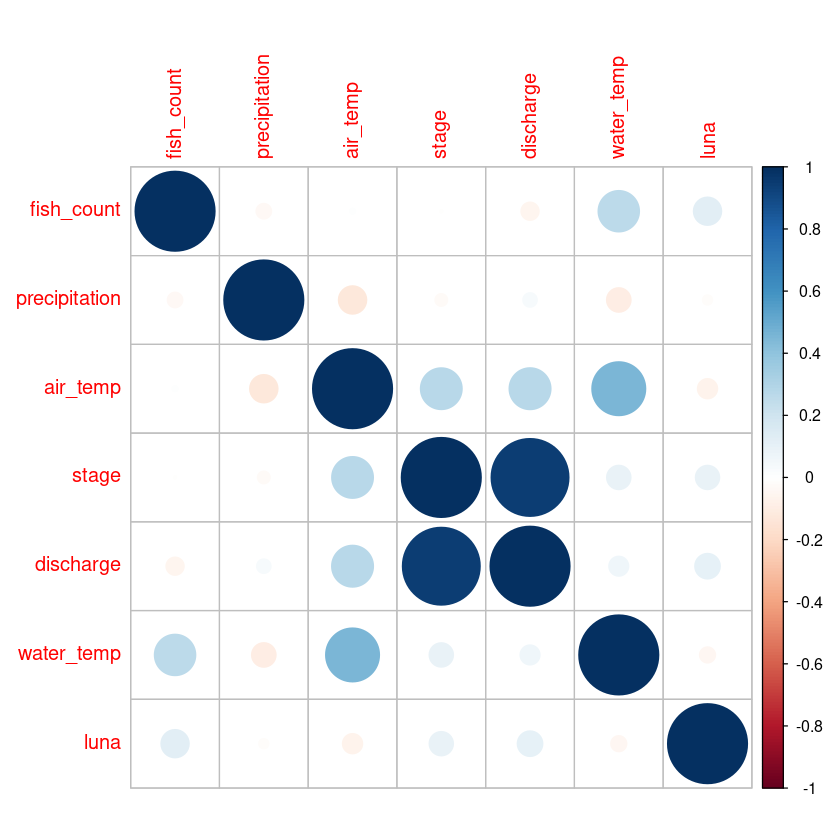

In [4]:
corrplot::corrplot(cor(subset(data, select=-c(date, year_x,moon_phase, set_location, drift_location, nets))))

## Filter out final training set

In [5]:
# Remove all unused col
data2 = subset(data, select = -c(date, year_x))
head(data2)

,fish_count,precipitation,air_temp,stage,discharge,water_temp,luna,moon_phase,set_location,drift_location,nets
,<int>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<int>,<chr>,<chr>,<chr>,<chr>
1,5034,0,57.5,9.92,15000,59.72,3,New Moon,None,None,no_nets
2,4212,0,56.5,10.02,15200,59.00,4,New Moon,None,Kasilof Section,drift
3,5796,0,58.5,10.04,15300,57.20,5,New Moon,None,None,no_nets
4,7314,0,57.5,10.08,15300,56.84,6,New Moon,None,District Wide except Chinitna Bay Sub,drift
5,7386,0,55.5,10.03,15200,57.02,7,New Moon,None,None,no_nets
6,10341,0,57.5,10.02,15100,56.84,10,First Quarter,None,Drift Area 1,drift


In [6]:
# Convert categorical to numeric
# https://statisticsglobe.com/unclass-function-r


data2$moon_phase = unclass(as.factor(data2$moon_phase))
data2$set_location = unclass(as.factor(data2$set_location))
data2$drift_location = unclass(as.factor(data2$drift_location))
data2$nets = unclass(as.factor(data2$nets))

In [7]:
head(data2)

,fish_count,precipitation,air_temp,stage,discharge,water_temp,luna,moon_phase,set_location,drift_location,nets
,<int>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>
1,5034,0,57.5,9.92,15000,59.72,3,3,9,19,3
2,4212,0,56.5,10.02,15200,59.00,4,3,9,18,2
3,5796,0,58.5,10.04,15300,57.20,5,3,9,19,3
4,7314,0,57.5,10.08,15300,56.84,6,3,9,4,2
5,7386,0,55.5,10.03,15200,57.02,7,3,9,19,3
6,10341,0,57.5,10.02,15100,56.84,10,1,9,5,2


## Check for normality

In [8]:
options(repr.plot.width = 13, repr.plot.height =7)

Warning message:
“attributes are not identical across measure variables;
they will be dropped”


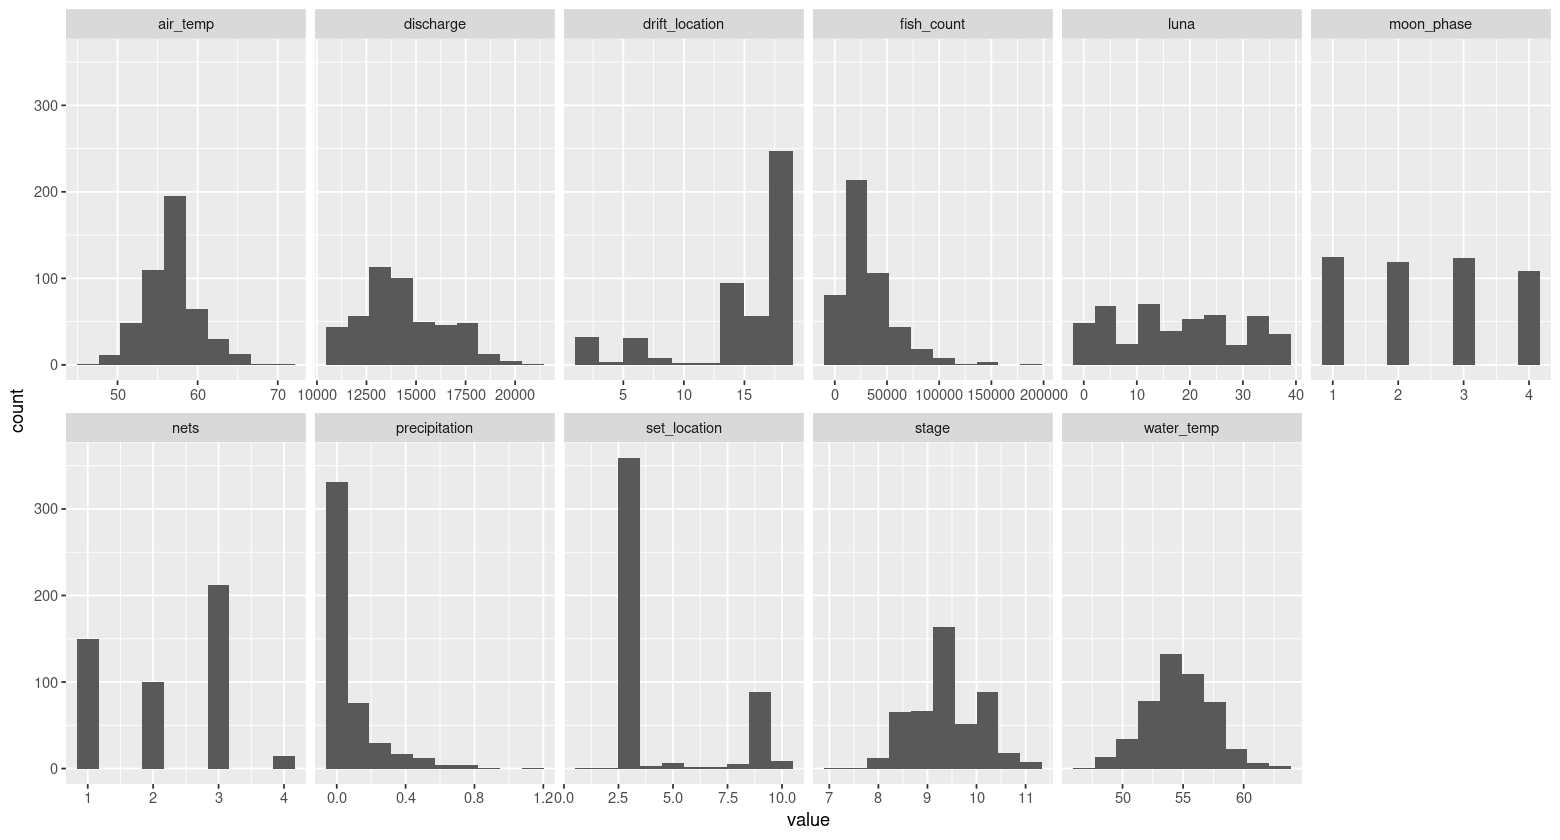

In [9]:
ggplot(gather(data2), aes(value)) + 
    geom_histogram(bins = 10) + 
    facet_wrap(~key, nrow=2, scales = 'free_x')

Seem like drift_location, precipitation, and set_location need to be log transform.

In [10]:
final_data = data.frame(data2)
head(final_data)

,fish_count,precipitation,air_temp,stage,discharge,water_temp,luna,moon_phase,set_location,drift_location,nets
,<int>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>
1,5034,0,57.5,9.92,15000,59.72,3,3,9,19,3
2,4212,0,56.5,10.02,15200,59.00,4,3,9,18,2
3,5796,0,58.5,10.04,15300,57.20,5,3,9,19,3
4,7314,0,57.5,10.08,15300,56.84,6,3,9,4,2
5,7386,0,55.5,10.03,15200,57.02,7,3,9,19,3
6,10341,0,57.5,10.02,15100,56.84,10,1,9,5,2


## Optional: Log Transform

In [11]:
# How to perform a log transform - https://www.statology.org/transform-data-in-r/ 

In [12]:
# data3 = data.frame(data2)
# data3$log_precipitation = log10(data3$precipitation)

In [13]:
# # Replace finite data
# data3$log_precipitation[which(!is.finite(data3$log_precipitation))] <- 0

In [14]:
# ggplot(gather(data3), aes(value)) + 
#     geom_histogram(bins = 10) + 
#     facet_wrap(~key, scales = 'free_x')

In [15]:
# final_data = subset(data3, select = -c(precipitation))
# head(final_data)

## Split train/test set

In [16]:
set.seed(6203)

# Split 80/20
split_dummy <- sample(c(rep(0, 0.7 * nrow(final_data)), 
                        rep(1, 0.3 * nrow(final_data))))
table(split_dummy)

split_dummy
  0   1 
333 142 

In [17]:
train_data = final_data[split_dummy == 0, ] 
test_data = final_data[split_dummy == 1, ] 

# Modeling

## Random Forest

In [18]:
# https://www.statology.org/random-forest-in-r/ 

In [35]:
if (!require(randomForest)) install.packages("randomForest", lib="../work/")
library(randomForest)

In [20]:
set.seed(6203)
rf = randomForest(fish_count~., data=train_data)
rf


Call:
 randomForest(formula = fish_count ~ ., data = train_data) 
               Type of random forest: regression
                     Number of trees: 500
No. of variables tried at each split: 3

          Mean of squared residuals: 412400272
                    % Var explained: 35.2

In [21]:
# find number of trees that produce lowest test MSE
cat("The lowest tree", which.min(rf$mse), "\n")


#find RMSE of best model
cat("The lowest MSE is", sqrt(rf$mse[which.min(rf$mse)])) 

The lowest tree 298 
The lowest MSE is 20297.82

## Ridge Regression

In [22]:
# https://www.statology.org/ridge-regression-in-r/

In [36]:
library(glmnet)

In [24]:
set.seed(6203)
ridge = glmnet(data.matrix(train_data[,-1]), train_data[,1], 
               alpha=0, family = "gaussian")
summary(ridge)

          Length Class     Mode   
a0         100   -none-    numeric
beta      1000   dgCMatrix S4     
df         100   -none-    numeric
dim          2   -none-    numeric
lambda     100   -none-    numeric
dev.ratio  100   -none-    numeric
nulldev      1   -none-    numeric
npasses      1   -none-    numeric
jerr         1   -none-    numeric
offset       1   -none-    logical
call         5   -none-    call   
nobs         1   -none-    numeric

### Ridge Regression w/ Cross Validation

[1] 895.2297

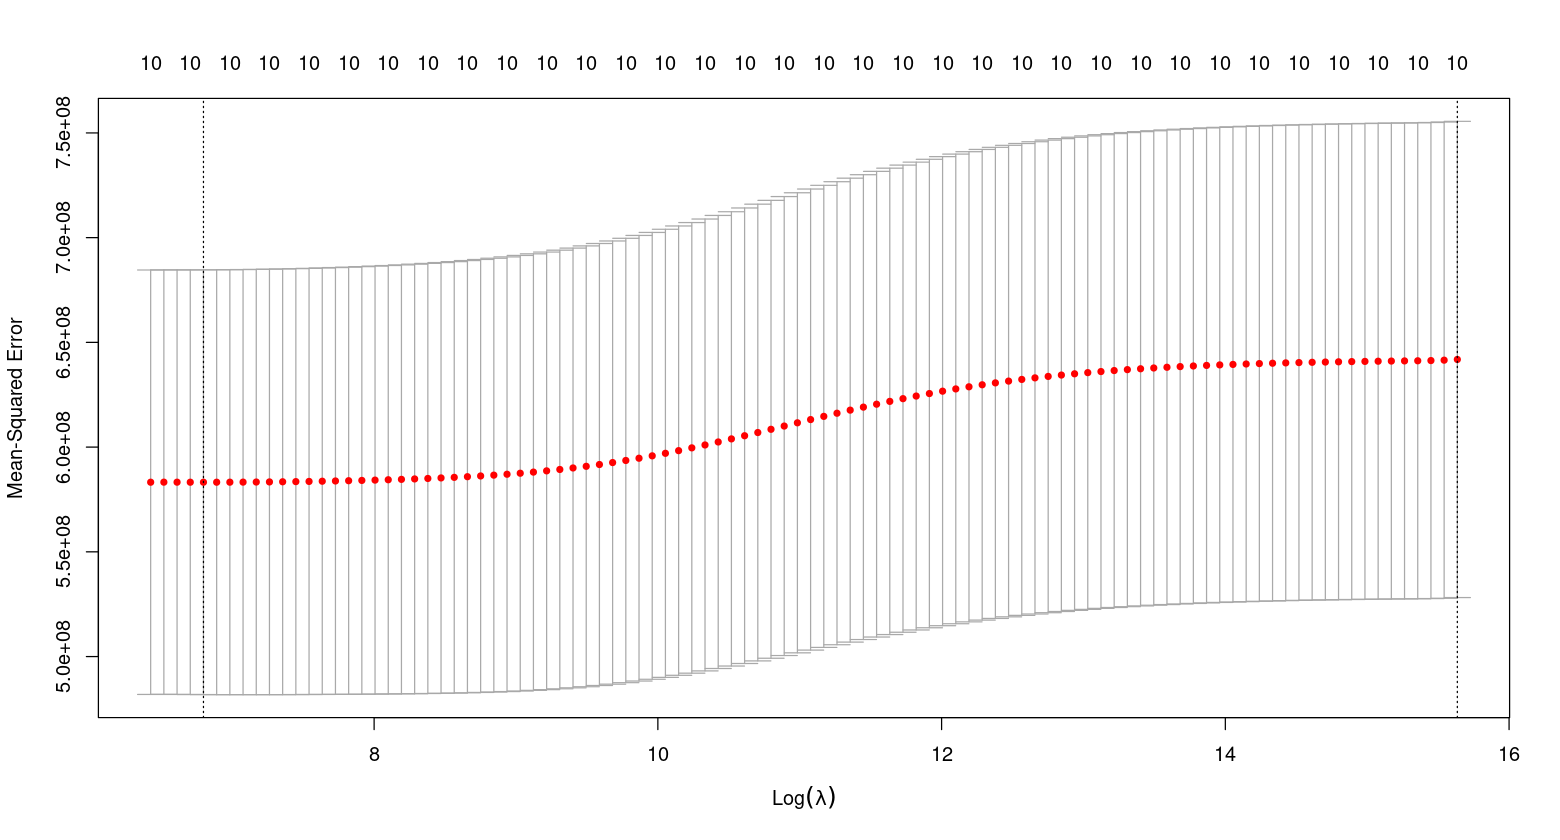

In [25]:
set.seed(6203)

#perform k-fold cross-validation to find optimal lambda value
ridge_cv = cv.glmnet(data.matrix(train_data[,-1]), train_data[,1], alpha=0)

#find optimal lambda value that minimizes test MSE
ridge_best_lambda <- ridge_cv$lambda.min
ridge_best_lambda

#produce plot of test MSE by lambda value
plot(ridge_cv) 

In [26]:
set.seed(6203)

#find coefficients of best model
ridge_best <- glmnet(data.matrix(train_data[,-1]), train_data[,1], 
                     lambda = ridge_best_lambda)
coef(ridge_best)

11 x 1 sparse Matrix of class "dgCMatrix"
                          s0
(Intercept)    -7.112340e+04
precipitation   .           
air_temp       -3.034351e+02
stage           .           
discharge      -9.502739e-01
water_temp      2.360959e+03
luna            8.237280e+01
moon_phase      2.741198e+03
set_location   -2.150390e+02
drift_location -1.623654e+02
nets           -3.514901e+02

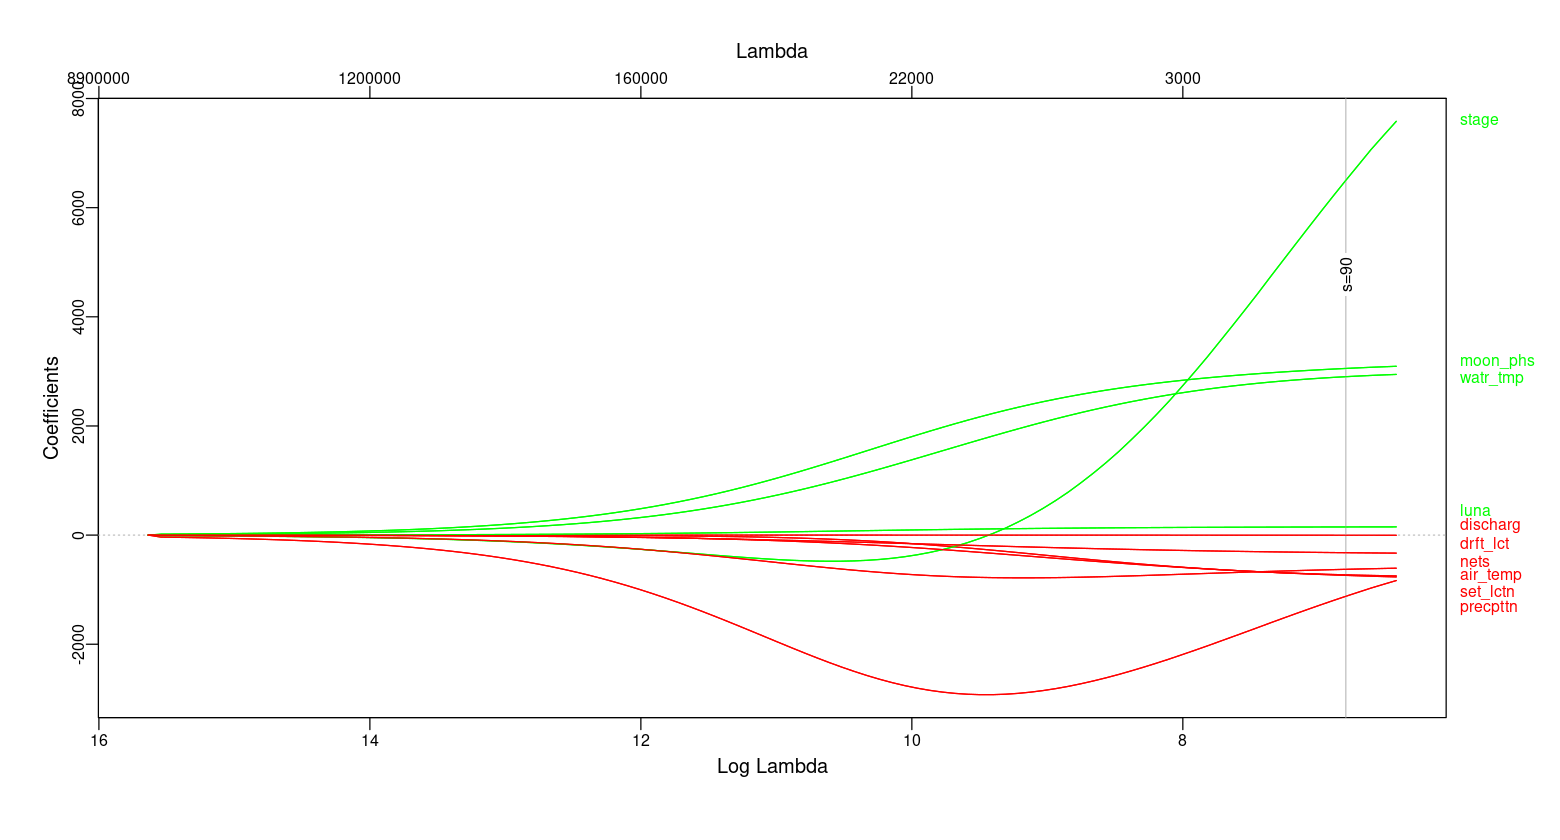

In [27]:
set.seed(6203)

glmcoef<-coef(ridge,ridge_cv$lambda.min)
coef.increase<-dimnames(glmcoef[glmcoef[,1]>0,0])[[1]]
coef.decrease<-dimnames(glmcoef[glmcoef[,1]<0,0])[[1]]

#get ordered list of variables as they appear at smallest lambda
allnames<-names(coef(ridge)[,
    ncol(coef(ridge))][order(coef(ridge)[,
    ncol(coef(ridge))],decreasing=TRUE)])

#remove intercept
allnames<-setdiff(allnames,allnames[grep("Intercept",allnames)])

#assign colors
cols<-rep("gray",length(allnames))
cols[allnames %in% coef.increase]<-"green"      # higher mpg is good
cols[allnames %in% coef.decrease]<-"red"        # lower mpg is not

plot_glmnet(ridge,label=TRUE,s=ridge_cv$lambda.min,col=cols)


In [28]:
set.seed(6203)

#use fitted best model to make predictions
ridge_pred <- predict(ridge, s = ridge_best_lambda, newx = data.matrix(test_data[,-1]))

#find SST and SSE
sst <- sum((test_data[,1] - mean(test_data[,1]))^2)
sse <- sum((ridge_pred - test_data[,1])^2)

#find R-Squared
rsq <- 1 - sse/sst
rsq

[1] 0.1237642

## Lasso Regression

In [29]:
set.seed(6203)

lasso = glmnet(data.matrix(train_data[,-1]), train_data[,1], 
               alpha=1, family = "gaussian")
summary(lasso)

          Length Class     Mode   
a0         70    -none-    numeric
beta      700    dgCMatrix S4     
df         70    -none-    numeric
dim         2    -none-    numeric
lambda     70    -none-    numeric
dev.ratio  70    -none-    numeric
nulldev     1    -none-    numeric
npasses     1    -none-    numeric
jerr        1    -none-    numeric
offset      1    -none-    logical
call        5    -none-    call   
nobs        1    -none-    numeric

### Ridge Regression w/ Cross Validation

[1] 149.3333

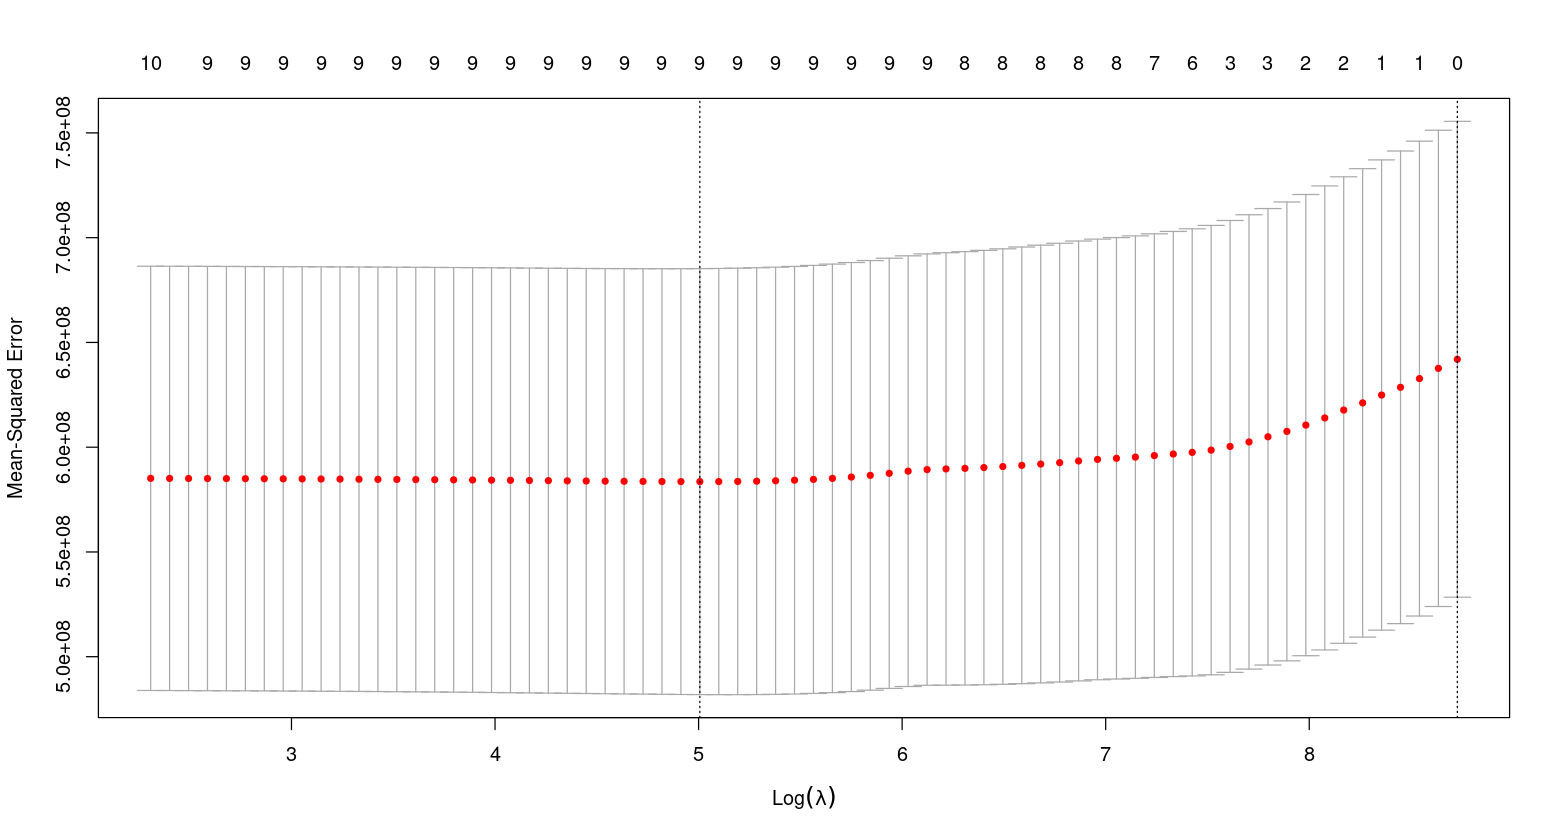

In [30]:
set.seed(6203)

#perform k-fold cross-validation to find optimal lambda value
lasso_cv = cv.glmnet(data.matrix(train_data[,-1]), train_data[,1], 
                     alpha=1)

#find optimal lambda value that minimizes test MSE
lasso_best_lambda <- lasso_cv$lambda.min
lasso_best_lambda

#produce plot of test MSE by lambda value
plot(lasso_cv) 

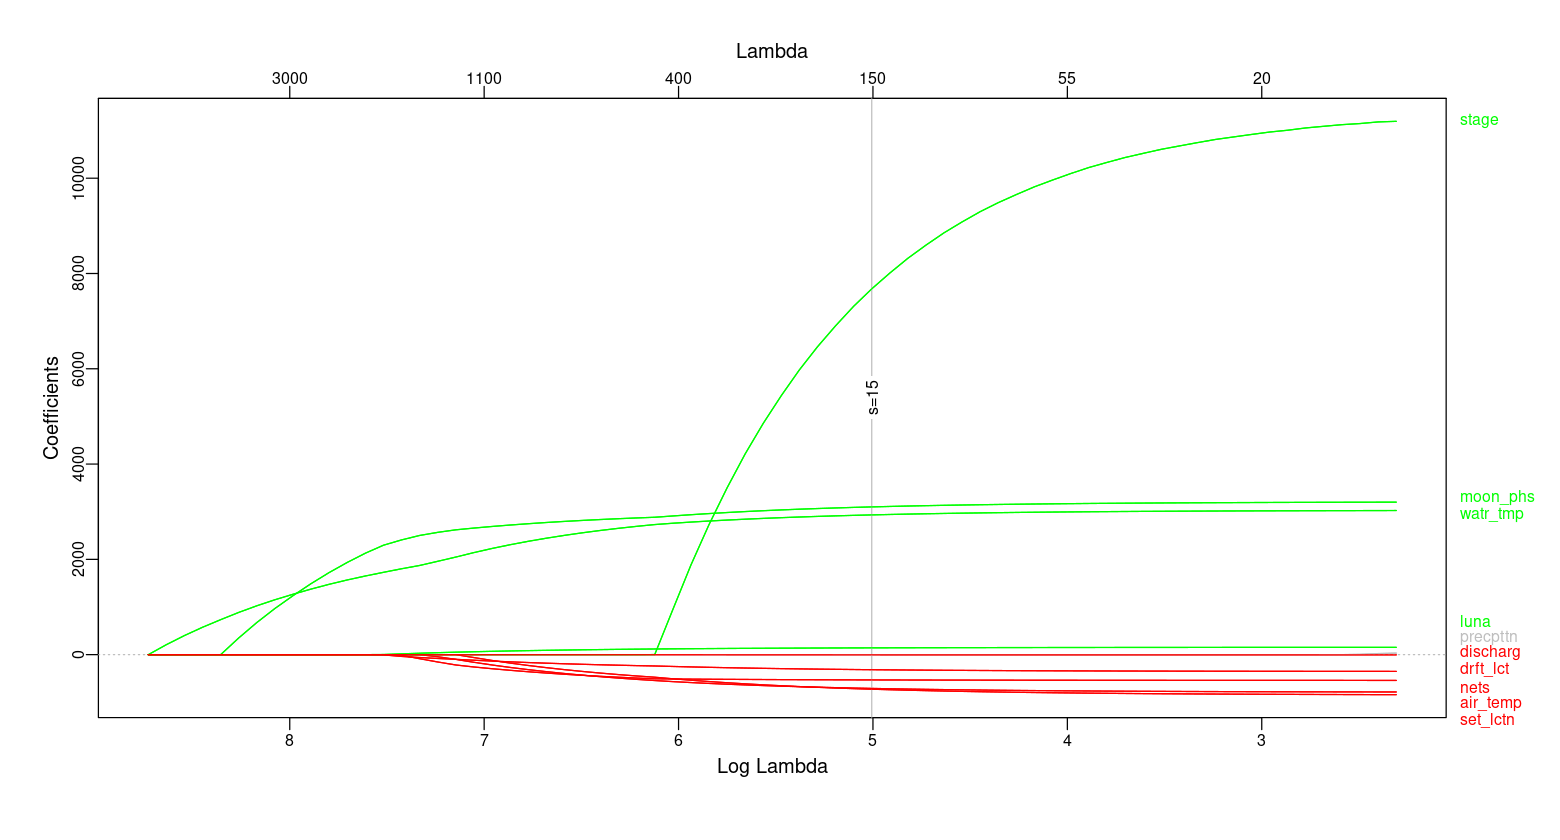

In [31]:
set.seed(6203)

glmcoef<-coef(lasso,lasso_cv$lambda.min)
coef.increase<-dimnames(glmcoef[glmcoef[,1]>0,0])[[1]]
coef.decrease<-dimnames(glmcoef[glmcoef[,1]<0,0])[[1]]

#get ordered list of variables as they appear at smallest lambda
allnames<-names(coef(lasso)[,
    ncol(coef(lasso))][order(coef(lasso)[,
    ncol(coef(lasso))],decreasing=TRUE)])

#remove intercept
allnames<-setdiff(allnames,allnames[grep("Intercept",allnames)])

#assign colors
cols<-rep("gray",length(allnames))
cols[allnames %in% coef.increase]<-"green"      # higher mpg is good
cols[allnames %in% coef.decrease]<-"red"        # lower mpg is not

plot_glmnet(lasso,label=TRUE,s=lasso_cv$lambda.min,col=cols)

In [32]:
set.seed(6203)

#find coefficients of best model
lasso_best <- glmnet(data.matrix(train_data[,-1]), train_data[,1], 
                     lambda = lasso_best_lambda)
coef(lasso_best)

11 x 1 sparse Matrix of class "dgCMatrix"
                          s0
(Intercept)    -110811.77079
precipitation        .      
air_temp          -708.48857
stage             7679.49200
discharge           -3.59305
water_temp        2932.60521
luna               142.34351
moon_phase        3101.13027
set_location      -725.54145
drift_location    -316.29403
nets              -530.68392

In [33]:
set.seed(6203)

#use fitted best model to make predictions
lasso_pred <- predict(lasso, s = lasso_best_lambda, newx = data.matrix(test_data[,-1]))

#find SST and SSE
sst <- sum((test_data[,1] - mean(test_data[,1]))^2)
sse <- sum((lasso_pred - test_data[,1])^2)

#find R-Squared
rsq <- 1 - sse/sst
rsq

[1] 0.1272062